# [선형회귀분석 실습 3: 변수 선택 및 변수 변환]

## 1. 모듈 불러오기

In [ ]:
# 데이터 전처리 패키지
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

# 기계학습 모델 & 데이터 셋 & 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pylab

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
california = fetch_california_housing()
print(california.DESCR)

In [ ]:
print(california.data)

## 2. 데이터 불러오기 및 전처리

In [ ]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['House Value'])

In [ ]:
X.head()

In [ ]:
data = pd.concat([X, y], axis=1)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=55)

## 3. 모델링

In [ ]:
lm = sm.OLS(train_data['House Value'], train_data.drop('House Value', axis=1))
lm_trained = lm.fit()
display(lm_trained.summary())

In [ ]:
test_pred = lm_trained.predict(test_data.drop('House Value', axis=1))

## 4. 유의하지 않은 변수 제거하기
### p-value가 높은 "Populaion" 변수를 모델에서 제거

In [ ]:
train_data_new = train_data.drop('Population', axis=1)
test_data_new = test_data.drop('Population', axis=1)

In [ ]:
lm_new = sm.OLS(train_data_new['House Value'], train_data_new.drop('House Value', axis=1))
lm_new_trained = lm_new.fit()
display(lm_new_trained.summary())

In [ ]:
test_pred_new = lm_new_trained.predict(test_data_new.drop('House Value', axis=1))

변수 제거 전후의 예측성능 비교하기

In [ ]:
test_mse = mean_squared_error(test_data['House Value'], test_pred)
test_rmse = np.sqrt(mean_squared_error(test_data['House Value'], test_pred))
test_mae = mean_absolute_error(test_data['House Value'], test_pred)
test_mape = mean_absolute_percentage_error(test_data['House Value'], test_pred)

test_mse_new = mean_squared_error(test_data_new['House Value'], test_pred_new)
test_rmse_new = np.sqrt(mean_squared_error(test_data_new['House Value'], test_pred_new))
test_mae_new = mean_absolute_error(test_data_new['House Value'], test_pred_new)
test_mape_new = mean_absolute_percentage_error(test_data_new['House Value'], test_pred_new)

In [ ]:
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new))

## 5. 상관계수가 높은 변수 제거하기
### correlation이 높은 변수 "AveRooms"와 "AveBedrms" 중 "AveBedrms" 변수 제거하기

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data.corr())

In [ ]:
train_data_new2 = train_data.drop('AveBedrms', axis=1)
test_data_new2 = test_data.drop('AveBedrms', axis=1)

In [ ]:
lm_new2 = sm.OLS(train_data_new2['House Value'], train_data_new2.drop('House Value', axis=1))
lm_new2_trained = lm_new2.fit()
display(lm_new2_trained.summary())
test_pred_new2 = lm_new2_trained.predict(test_data_new2.drop('House Value', axis=1))

변수 제거 전후의 예측성능 비교하기

In [ ]:
test_mse_new2 = mean_squared_error(test_data_new2['House Value'], test_pred_new2)
test_rmse_new2 = np.sqrt(mean_squared_error(test_data_new2['House Value'], test_pred_new2))
test_mae_new2 = mean_absolute_error(test_data_new2['House Value'], test_pred_new2)
test_mape_new2 = mean_absolute_percentage_error(test_data_new2['House Value'], test_pred_new2)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new2))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new2))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new2))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new2))

## 6. 변수 변환하기: 설명변수(X) or 반응변수(y) 변환

### 설명변수(X) 변환: 정규화(MinMax 등)

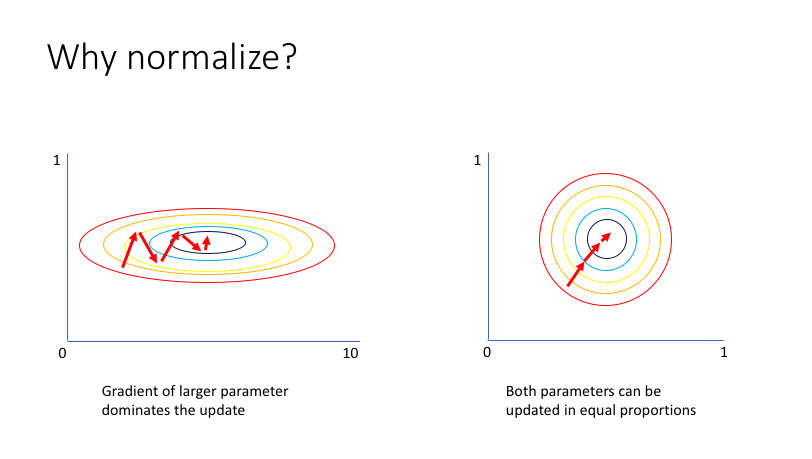
###### 참조:  https://www.jeremyjordan.me/batch-normalization/

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data.drop('House Value', axis=1))
data_normalized = pd.DataFrame(data_normalized, columns=data.drop('House Value', axis=1).columns)

## 정규화 후

In [ ]:
data_normalized.head()

## 정규화 전

In [ ]:
data.drop('House Value', axis=1).head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized, data['House Value'], test_size=0.3, random_state=20190625)

In [ ]:
lm_norm = sm.OLS(y_train, X_train)
lm_norm_trained = lm_norm.fit()
display(lm_norm_trained.summary())

In [ ]:
y_pred = lm_norm_trained.predict(X_test)
y_pred.head()

In [ ]:
test_mse_norm = mean_squared_error(y_test, y_pred)
test_rmse_norm = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae_norm = mean_absolute_error(y_test, y_pred)
test_mape_norm = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_norm))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_norm))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_norm))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_norm))

### 반응변수(y)를 변환: $y$ 대신 $\sqrt{y}$ 또는 $\log y$를 예측하는 모델 학습
-  $\sqrt{y}$ 

In [ ]:
train_data_new3 = train_data.copy()
test_data_new3 = test_data.copy()

In [ ]:
train_data_new3['House Value'] = np.sqrt(train_data_new3['House Value'].values)

lm_new3 = sm.OLS(train_data_new3['House Value'], train_data_new3.drop('House Value', axis=1))
lm_trained_new3 = lm_new3.fit()
display(lm_trained_new3.summary())

In [ ]:
test_pred_new3 = lm_trained_new3.predict(test_data_new3.drop('House Value', axis=1))
test_pred_new3.head()

In [ ]:
test_pred_new3 = np.square(test_pred_new3)
test_pred_new3.head()

In [ ]:
test_mse_new3 = mean_squared_error(test_data_new3['House Value'], test_pred_new3)
test_rmse_new3 = np.sqrt(mean_squared_error(test_data_new3['House Value'], test_pred_new3))
test_mae_new3 = mean_absolute_error(test_data_new3['House Value'], test_pred_new3)
test_mape_new3 = mean_absolute_percentage_error(test_data_new3['House Value'], test_pred_new3)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new3))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new3))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new3))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new3))

$\log y$

In [ ]:
train_data_new4 = train_data.copy()
test_data_new4 = test_data.copy()

In [ ]:
train_data_new4['House Value'] = np.log(train_data_new4['House Value'].values)

lm_new4 = sm.OLS(train_data_new4['House Value'], train_data_new4.drop('House Value', axis=1))
lm_trained_new4 = lm_new4.fit()
display(lm_trained_new4.summary())

In [ ]:
test_pred_new4 = lm_trained_new4.predict(test_data_new4.drop('House Value', axis=1))
test_pred_new4.head()

In [ ]:
test_pred_new4 = np.exp(test_pred_new4)
test_pred_new4.head()

In [ ]:
test_mse_new4 = mean_squared_error(test_data_new4['House Value'], test_pred_new4)
test_rmse_new4 = np.sqrt(mean_squared_error(test_data_new4['House Value'], test_pred_new4))
test_mae_new4 = mean_absolute_error(test_data_new4['House Value'], test_pred_new3)
test_mape_new4 = mean_absolute_percentage_error(test_data_new4['House Value'], test_pred_new4)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new4))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new4))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new4))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new4))